In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-13 14:05:43--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-08-13 14:05:43 (4.46 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
df = dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
for col in df.select_dtypes(include = object):
  print(f"{col} as unique:{df[col].unique()}")

sex as unique:['female' 'male']
smoker as unique:['yes' 'no']
region as unique:['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
from sklearn.preprocessing import LabelEncoder
def preprocessor(dataset):

  le = LabelEncoder()
  dataset['sex'] = le.fit_transform(dataset['sex'])
  dataset['smoker'] = le.fit_transform(dataset['smoker'])
  dataset['region'] = le.fit_transform(dataset['region'])

  dataset = dataset.astype(float)
  return df

In [8]:
df =preprocessor(df)
y = df.pop('expenses')
X = df

In [9]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [10]:
X.shape[1]

6

In [29]:
import tensorflow as tf
import keras
from keras import layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 256)               1792      
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,841
Trainable params: 34,829
Non-trainable params: 12
_________________________________________________________________


In [30]:
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
38/38 [==============================] - 2s 9ms/step - loss: 79642720.0000 - mae: 5514.2095 - mse: 79642720.0000 - val_loss: 2018446080.0000 - val_mae: 43476.8711 - val_mse: 2018446080.0000
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 46317352.0000 - mae: 4322.8574 - mse: 46317352.0000 - val_loss: 214792752.0000 - val_mae: 13001.2285 - val_mse: 214792752.0000
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 45610568.0000 - mae: 4218.4604 - mse: 45610568.0000 - val_loss: 320134080.0000 - val_mae: 16065.3213 - val_mse: 320134080.0000
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 39356288.0000 - mae: 3977.3188 - mse: 39356288.0000 - val_loss: 58877928.0000 - val_mae: 6474.1675 - val_mse: 58877928.0000
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 49167344.0000 - mae: 4301.4170 - mse: 49167344.0000 - val_loss: 58268860.0000 - val_mae: 6218.3198 - val_mse: 58268860.0000
Epoc

42/42 - 0s - loss: 20210310.0000 - mae: 2465.4272 - mse: 20210310.0000 - 99ms/epoch - 2ms/step
Testing set Mean Abs Error: 2465.43 expenses
You passed the challenge. Great job!
42/42 [==============================] - 0s 2ms/step


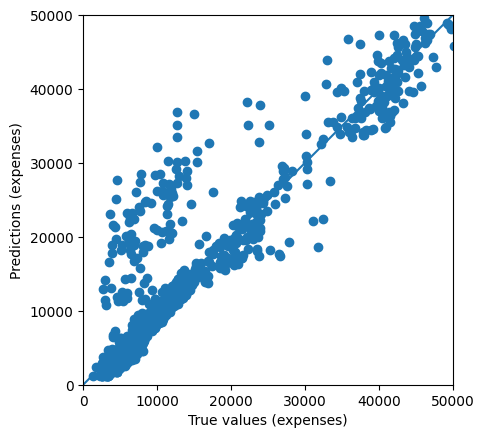

In [31]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(X, y, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(X).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_predictions, y)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
